In [70]:
# General:
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import somoclu
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# For feature extraction:
import fasttext
from pattern.en import sentiment
import chardet
from collections import Counter
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
with open('../data/nlp_preprocessed_data.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
tweetData = pd.read_csv('../data/nlp_preprocessed_data.csv', encoding = enc['encoding'], index_col=False)
tweetData

index         username  verified  followersCount  \
0          0  HuyThanhNguyen5     False               0   
1          2     guaslackjack     False             125   
2          3          gerryrb     False             935   
3          4       rickitten_     False               9   
4          5       saboteurDS     False             278   
...      ...              ...       ...             ...   
97655   9943       darookie74     False              51   
97656   9944  JAtheArsenalFan     False               8   
97657   9945  mistermarkjones     False            2297   
97658   9946        louiscoys     False            1834   
97659   9947      yvanlinford     False            1268   

                                                 content  label  \
0      @unitedstandmufc @markgoldbridge get ole again...   -1.0   
1      best goal: bruno top assists: pogba ??: cristi...    1.0   
2      @lost_souls_07 @kayinfinite28 @altyred2 @utdpl...    0.0   
3      players spurs in old trafford #mufc #muntot ht...    0.0   
4      @tancredipalmeri why on earth would #mufc pay ...   -1.0   
...                                                  ...    ...   
97655                         draw incoming here #totful    0.0   
97656  for the next 30 minutes, we are all fulham sup...    1.0   
97657  well that's obviously not a pen. #totche #thch...    0.0   
97658  if brighton win tomorrow they will be top of t...   -1.0   
97659  thanks pal @bluearmy195. buzzing utc ?? #totch...    NaN   

                      date        country  replyCount  retweetCount  \
0      2022-08-31 15:12:54          India           0             0   
1      2021-09-11 15:56:21          India           0             0   
2      2022-09-03 14:29:34      Argentina           1             0   
3      2022-03-12 19:14:18          India           0             0   
4      2022-08-28 12:07:34          India           0             0   
...                    ...            ...         ...           ...   
97655  2022-09-03 15:31:19      Argentina           0             0   
97656  2022-09-03 15:15:01  United States           0             0   
97657  2022-01-12 21:03:43      Argentina           0             0   
97658  2021-09-26 16:13:44      Argentina           0             0   
97659  2022-01-12 15:37:10      Argentina           0             1   

       likeCount                                                url  \
0              0  https://twitter.com/HuyThanhNguyen5/status/156...   
1              0  https://twitter.com/guaslackjack/status/143672...   
2              1  https://twitter.com/gerryrb/status/15660709054...   
3              0  https://twitter.com/rickitten_/status/15027246...   
4              2  https://twitter.com/saboteurDS/status/15638608...   
...          ...                                                ...   
97655          0  https://twitter.com/darookie74/status/15660864...   
97656          0  https://twitter.com/JAtheArsenalFan/status/156...   
97657          0  https://twitter.com/mistermarkjones/status/148...   
97658          1  https://twitter.com/louiscoys/status/144216046...   
97659          0  https://twitter.com/yvanlinford/status/1481289...   

                                        hashtags        primaryTeam  \
0                                             []  Manchester United   
1           ['GGMU', 'MUFC', 'MANUTD', 'MUNNEW']  Manchester United   
2                                             []  Manchester United   
3                             ['MUFC', 'MUNTOT']  Manchester United   
4                                       ['mufc']  Manchester United   
...                                          ...                ...   
97655                                 ['TOTFUL']          Tottenham   
97656                  ['TOTFUL', 'WeAreFulham']          Tottenham   
97657                        ['TotChe', 'THCHE']          Tottenham   
97658  ['coys', 'nunoout', 'levyout', 'enicout']          Tottenham   
97659 

ManCity              25983
Manchester United    18064
Liverpool            15516
Chelsea              15239
Arsenal              14071
Tottenham             8787
Name: primaryTeam, dtype: int64


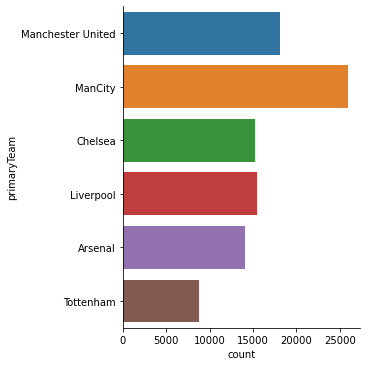

In [72]:
print(tweetData["primaryTeam"].value_counts())
sns.catplot(y = "primaryTeam", data = tweetData, kind = "count")

In [73]:
hashList = []
for hashtag in tweetData['hashtags']:
    hashtag = hashtag.replace('[', '')
    hashtag = hashtag.replace(']', '')
    hashtag = hashtag.replace("'", '')
    
    if(len(hashtag) != 0):
        tags = hashtag.split(", ")
        hashList.append(tags)

concatHashList = [j for i in hashList for j in i]
print(concatHashList)

uniqueHash = Counter(concatHashList)
print(uniqueHash.items())

['GGMU', 'MUFC', 'MANUTD', 'MUNNEW', 'MUFC', 'MUNTOT', 'mufc', 'MuFC', 'ManchesterUnited', 'GlazersSellNow', 'MUFC', 'United', 'UTFR', 'GGMU', 'mufc', 'MUNTOT', 'mufc', 'GlazersOut', 'MUNMCI', 'mufc', 'epl', 'MUNARS', 'ronaldo', 'antony', 'sancho', 'oleout', 'ManchesterUnited', 'ManUtd', 'MUFC', 'GlazersOut', 'lcfc', 'mufc', 'GGMU', 'mufc', 'ggmu', 'weareunited', 'united', 'arsenal', 'ManUtd', 'manuars', 'MUFC', 'Dubravka', 'ManchesterUnited', 'MUFC', 'TransferWindow', 'DeadlineDay', 'GGMU', 'MUNMCI', 'LCFC', 'MUFC', 'LEIMUN', 'OldTrafford', 'GlazersOut', 'BREMUN', 'eriktenhag', 'MUTD', 'ManchesterUnited', 'Liverpool', 'MUFC', 'LEIMUN', 'MUFC', 'BBCFootball', 'MUNTOT', 'mufc', 'tenhag', 'MUFC', 'GGMU', 'MUNTOT', 'mufc', 'MUFC', 'ManUtd', 'Cristiano', 'RedDevils', 'Championship', 'Leicester', 'ManUtd', 'Arsenal', 'COYG', 'GGMU', 'mufc', 'MUNMCI', 'mufc', 'GlazersOut', 'manchesterunited', 'manutd', 'weareunited', 'IAMUNITEDMY', 'adidas', 'adidasmy', 'adidasfootball', 'dxctechnology', 'GG

In [74]:
print(uniqueHash.keys())

dict_keys(['GGMU', 'MUFC', 'MANUTD', 'MUNNEW', 'MUNTOT', 'mufc', 'MuFC', 'ManchesterUnited', 'GlazersSellNow', 'United', 'UTFR', 'GlazersOut', 'MUNMCI', 'epl', 'MUNARS', 'ronaldo', 'antony', 'sancho', 'oleout', 'ManUtd', 'lcfc', 'ggmu', 'weareunited', 'united', 'arsenal', 'manuars', 'Dubravka', 'TransferWindow', 'DeadlineDay', 'LCFC', 'LEIMUN', 'OldTrafford', 'BREMUN', 'eriktenhag', 'MUTD', 'Liverpool', 'BBCFootball', 'tenhag', 'Cristiano', 'RedDevils', 'Championship', 'Leicester', 'Arsenal', 'COYG', 'manchesterunited', 'manutd', 'IAMUNITEDMY', 'adidas', 'adidasmy', 'adidasfootball', 'dxctechnology', 'oldtrafford', 'ManUnited', 'PremierLeague', 'mufctransfer', 'MUFC_FAMILY', 'SirJimRatcliffeln', 'MUNLIV', 'MUNCHE', 'MU', 'ManchesterUtd', 'Zayden', 'ZayZay', 'LittleRed', 'TheatreOfDreams', 'AnthonyElanga', 'RedArmy', 'MUTOUR22', 'PreSeason', 'Glazersout', 'liverpool', 'premierleague', 'YNWA', 'ManUnitedDisaster', 'relegationbattle', 'manutdliverpool', 'LiverpoolFC', 'LFC', 'ErikTenHag',

In [75]:
manuData = tweetData.loc[tweetData['primaryTeam'] == 'Manchester United']
mancData = tweetData.loc[tweetData['primaryTeam'] == 'ManCity']
chelseaData = tweetData.loc[tweetData['primaryTeam'] == 'Chelsea']
arsenalData = tweetData.loc[tweetData['primaryTeam'] == 'Arsenal']
liverpoolData = tweetData.loc[tweetData['primaryTeam'] == 'Liverpool']
totData = tweetData.loc[tweetData['primaryTeam'] == 'Tottenham']

In [76]:
manuData = manuData.drop('username', axis=1)
manuData = manuData.drop('verified', axis=1)
manuData = manuData.drop('followersCount', axis=1)
manuData = manuData.drop('label', axis=1)
manuData = manuData.drop('date', axis=1)
manuData = manuData.drop('country', axis=1)
manuData = manuData.drop('replyCount', axis=1)
manuData = manuData.drop('retweetCount', axis=1)
manuData = manuData.drop('likeCount', axis=1)
manuData = manuData.drop('url', axis=1)
manuData = manuData.drop('hashtags', axis=1)
manuData = manuData.drop('cleantext_no_spell', axis=1)
manuData = manuData.drop('primaryTeam', axis=1)
manuData = manuData.drop('index', axis=1)

manuData

content
0      @unitedstandmufc @markgoldbridge get ole again...
1      best goal: bruno top assists: pogba ??: cristi...
2      @lost_souls_07 @kayinfinite28 @altyred2 @utdpl...
3      players spurs in old trafford #mufc #muntot ht...
4      @tancredipalmeri why on earth would #mufc pay ...
...                                                  ...
18059  absolutely f#ck off! just seeing it talk shoul...
18060  congratulations to all winners yesterday. toda...
18061  half an hour to go until leicester city?? vs m...
18062  always a legend but ultimately fall short as a...
18063  @mikeyipdotcom @kennywong @galvintan @katieemu...

[18064 rows x 1 columns]

In [77]:
# Function to modulate a tweet
def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join( [w for w in tweetMod.split() if len(w)>1] )
    
    return tweetMod

# Process for all tweets
manuData['modTweet'] = [featureEngineering(tweet) for tweet in manuData['content']]
manuData

content  \
0      @unitedstandmufc @markgoldbridge get ole again...   
1      best goal: bruno top assists: pogba ??: cristi...   
2      @lost_souls_07 @kayinfinite28 @altyred2 @utdpl...   
3      players spurs in old trafford #mufc #muntot ht...   
4      @tancredipalmeri why on earth would #mufc pay ...   
...                                                  ...   
18059  absolutely f#ck off! just seeing it talk shoul...   
18060  congratulations to all winners yesterday. toda...   
18061  half an hour to go until leicester city?? vs m...   
18062  always a legend but ultimately fall short as a...   
18063  @mikeyipdotcom @kennywong @galvintan @katieemu...   

                                                modTweet  
0      get ole again to tell long conversation that e...  
1      best goal bruno top assists pogba cristiano wh...  
2      souls don't know is the honest answer but he's...  
3              players spurs in old trafford mufc muntot  
4      why on earth would mufc pay for osimhen ronald...  
...                                                  ...  
18059  absolutely ck off just seeing it talk should b...  
18060  congratulations to all winners yesterday today...  
18061  half an hour to go until leicester city vs man...  
18062  always legend but ultimately fall short as man...  
18063                 fluxxy and don't forget glazersout  

[18064 rows x 2 columns]

In [79]:
# Function to tokenize the tweet
def tokenizeTweet(tweet, option):
  '''
  Tokenize the tweet, different methods - change as per accuracy and score requirements
    1: Use python split() function
    2: Use regex to extract alphabets plus 's and 't
    3: Use NLTK word_tokenize()
    4: Use NLTK word_tokenize(), remove stop words and apply lemmatization
  '''
  if option == 1:
    return tweet.split()
  elif option == 2:
    return re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', tweet)
  elif option == 3:
    return [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
  elif option == 4:
    words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
    # Remove stop words
    stop = set(stopwords.words('english'))
    words = [word for word in words if (word not in stop)]
    # Lemmatize words (first noun, then verb)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
    return lemmatized
  else:
    return []

# Choosing to lemmatize the text
manuData['modTweet'] = [tokenizeTweet(tweet, 4) for tweet in manuData['modTweet']]
manuData

content  \
0      @unitedstandmufc @markgoldbridge get ole again...   
1      best goal: bruno top assists: pogba ??: cristi...   
2      @lost_souls_07 @kayinfinite28 @altyred2 @utdpl...   
3      players spurs in old trafford #mufc #muntot ht...   
4      @tancredipalmeri why on earth would #mufc pay ...   
...                                                  ...   
18059  absolutely f#ck off! just seeing it talk shoul...   
18060  congratulations to all winners yesterday. toda...   
18061  half an hour to go until leicester city?? vs m...   
18062  always a legend but ultimately fall short as a...   
18063  @mikeyipdotcom @kennywong @galvintan @katieemu...   

                                                modTweet  
0      [get, ole, tell, long, conversation, everythin...  
1      [best, goal, bruno, top, assist, pogba, cristi...  
2      [soul, know, honest, answer, definitely, hard,...  
3            [player, spur, old, trafford, mufc, muntot]  
4      [earth, would, mufc, pay, osimhen, ronaldo, go...  
...                                                  ...  
18059  [absolutely, ck, see, talk, enough, horrible, ...  
18060  [congratulation, winner, yesterday, today, fix...  
18061  [half, hour, go, leicester, city, v, mancheste...  
18062  [always, legend, ultimately, fall, short, mana...  
18063                       [fluxxy, forget, glazersout]  

[18064 rows x 2 columns]

In [102]:
manuWordList = []
for wordList in manuData['modTweet']:
    for word in wordList:
        manuWordList.append(word)

uniqueManuWords = Counter(manuWordList)
print(len(uniqueManuWords))
print(uniqueManuWords.items())

13160
dict_items([('get', 1651), ('ole', 307), ('tell', 178), ('long', 209), ('conversation', 11), ('everything', 95), ('wheel', 29), ('train', 120), ('good', 872), ('sprit', 1), ('amaze', 67), ('finally', 121), ('player', 1109), ('kick', 134), ('manager', 314), ('job', 131), ('reporter', 23), ('want', 744), ('find', 96), ('word', 60), ('shock', 51), ('article', 13), ('view', 46), ('best', 376), ('goal', 678), ('bruno', 168), ('top', 272), ('assist', 61), ('pogba', 75), ('cristiano', 219), ('time', 844), ('alive', 7), ('ggmu', 1699), ('mufc', 5789), ('manutd', 1976), ('munnew', 16), ('soul', 31), ('know', 470), ('honest', 19), ('answer', 32), ('definitely', 67), ('hard', 103), ('nose', 2), ('businessman', 2), ('respect', 68), ('successful', 28), ('spur', 63), ('old', 521), ('trafford', 417), ('muntot', 448), ('earth', 19), ('would', 572), ('pay', 149), ('osimhen', 20), ('ronaldo', 1027), ('go', 1217), ('better', 392), ('party', 25), ('unite', 2986), ('another', 288), ('antony', 863), (

In [103]:
uniqueManuWords = uniqueManuWords.most_common(100)
for item in uniqueManuWords:
    print('__label__ManchesterUnited ' + item[0])

__label__ManchesterUnited mufc
__label__ManchesterUnited unite
__label__ManchesterUnited glazersout
__label__ManchesterUnited manchesterunited
__label__ManchesterUnited manutd
__label__ManchesterUnited ggmu
__label__ManchesterUnited get
__label__ManchesterUnited manchester
__label__ManchesterUnited game
__label__ManchesterUnited munliv
__label__ManchesterUnited go
__label__ManchesterUnited player
__label__ManchesterUnited play
__label__ManchesterUnited ronaldo
__label__ManchesterUnited man
__label__ManchesterUnited arsenal
__label__ManchesterUnited win
__label__ManchesterUnited team
__label__ManchesterUnited see
__label__ManchesterUnited back
__label__ManchesterUnited club
__label__ManchesterUnited come
__label__ManchesterUnited good
__label__ManchesterUnited munars
__label__ManchesterUnited need
__label__ManchesterUnited antony
__label__ManchesterUnited time
__label__ManchesterUnited like
__label__ManchesterUnited want
__label__ManchesterUnited fan
__label__ManchesterUnited munmci
__l

In [104]:
mancData = mancData.drop('username', axis=1)
mancData = mancData.drop('verified', axis=1)
mancData = mancData.drop('followersCount', axis=1)
mancData = mancData.drop('label', axis=1)
mancData = mancData.drop('date', axis=1)
mancData = mancData.drop('country', axis=1)
mancData = mancData.drop('replyCount', axis=1)
mancData = mancData.drop('retweetCount', axis=1)
mancData = mancData.drop('likeCount', axis=1)
mancData = mancData.drop('url', axis=1)
mancData = mancData.drop('hashtags', axis=1)
mancData = mancData.drop('cleantext_no_spell', axis=1)
mancData = mancData.drop('primaryTeam', axis=1)
mancData = mancData.drop('index', axis=1)

mancData

content
18064  haaland - the new poster boy for an anti-democ...
18065  manchester city about to unleash the new dynam...
18066  #mcfc #mancity #motd knowing teams can use 5 s...
18067  big day for all #manchestercity fans yesterday...
18068  3 goals in 5 and a half minutes is a helluva w...
...                                                  ...
44042  @jackmci_ @indykaila @lfc @mancity how the fuc...
44043  @lw_mcfc @jonathantighe78 @lulumindudu1 @alici...
44044  @bbcmotd was in disbelief watching that as neu...
44045  manchester city vs crystal palace was on bbc r...
44046  kyle mcfadzean | norwich city reaction https:/...

[25983 rows x 1 columns]

In [105]:
# Process for all tweets
mancData['modTweet'] = [featureEngineering(tweet) for tweet in mancData['content']]
mancData

content  \
18064  haaland - the new poster boy for an anti-democ...   
18065  manchester city about to unleash the new dynam...   
18066  #mcfc #mancity #motd knowing teams can use 5 s...   
18067  big day for all #manchestercity fans yesterday...   
18068  3 goals in 5 and a half minutes is a helluva w...   
...                                                  ...   
44042  @jackmci_ @indykaila @lfc @mancity how the fuc...   
44043  @lw_mcfc @jonathantighe78 @lulumindudu1 @alici...   
44044  @bbcmotd was in disbelief watching that as neu...   
44045  manchester city vs crystal palace was on bbc r...   
44046  kyle mcfadzean | norwich city reaction https:/...   

                                                modTweet  
18064  haaland the new poster boy for an anti democra...  
18065  manchester city about to unleash the new dynam...  
18066  mcfc mancity motd knowing teams can use subs f...  
18067  big day for all manchestercity fans yesterday ...  
18068  goals in and half minutes is helluva way to wi...  
...                                                  ...  
44042                          how the fuck should it be  
44043  mcfc it not though straight men make up most o...  
44044  was in disbelief watching that as neutral vill...  
44045  manchester city vs crystal palace was on bbc r...  
44046      kyle mcfadzean norwich city reaction skyblues  

[25983 rows x 2 columns]

In [106]:
# Choosing to lemmatize the text
mancData['modTweet'] = [tokenizeTweet(tweet, 4) for tweet in mancData['modTweet']]
mancData

content  \
18064  haaland - the new poster boy for an anti-democ...   
18065  manchester city about to unleash the new dynam...   
18066  #mcfc #mancity #motd knowing teams can use 5 s...   
18067  big day for all #manchestercity fans yesterday...   
18068  3 goals in 5 and a half minutes is a helluva w...   
...                                                  ...   
44042  @jackmci_ @indykaila @lfc @mancity how the fuc...   
44043  @lw_mcfc @jonathantighe78 @lulumindudu1 @alici...   
44044  @bbcmotd was in disbelief watching that as neu...   
44045  manchester city vs crystal palace was on bbc r...   
44046  kyle mcfadzean | norwich city reaction https:/...   

                                                modTweet  
18064  [haaland, new, poster, boy, anti, democratic, ...  
18065  [manchester, city, unleash, new, dynamic, atta...  
18066  [mcfc, mancity, motd, know, team, use, sub, fi...  
18067  [big, day, manchestercity, fan, yesterday, fan...  
18068  [goal, half, minute, helluva, way, win, champi...  
...                                                  ...  
44042                                             [fuck]  
44043  [mcfc, though, straight, men, make, audience, ...  
44044  [disbelief, watch, neutral, villa, mancity, motd]  
44045  [manchester, city, v, crystal, palace, bbc, ra...  
44046  [kyle, mcfadzean, norwich, city, reaction, sky...  

[25983 rows x 2 columns]

In [107]:
mancWordList = []
for wordList in mancData['modTweet']:
    for word in wordList:
        mancWordList.append(word)

uniqueMancWords = Counter(mancWordList)
print(len(uniqueMancWords))
print(uniqueMancWords.items())

12092
dict_items([('haaland', 3003), ('new', 423), ('poster', 9), ('boy', 224), ('anti', 7), ('democratic', 2), ('regime', 2), ('abudhabi', 2), ('mancity', 5368), ('sportswashing', 8), ('manchester', 1615), ('city', 6983), ('unleash', 5), ('dynamic', 6), ('attack', 105), ('upfront', 15), ('today', 1006), ('mci', 72), ('manchestercity', 2267), ('pre', 81), ('season', 1359), ('tour', 24), ('mcfc', 5808), ('motd', 37), ('know', 652), ('team', 1276), ('use', 187), ('sub', 175), ('find', 159), ('strange', 17), ('leave', 349), ('foden', 424), ('full', 239), ('min', 142), ('day', 712), ('grealish', 271), ('amp', 722), ('lvarez', 25), ('come', 982), ('big', 381), ('fan', 1005), ('yesterday', 79), ('fancy', 11), ('print', 23), ('celebrate', 73), ('history', 108), ('club', 783), ('head', 152), ('online', 23), ('shop', 37), ('mug', 7), ('coaster', 3), ('cushion', 4), ('available', 60), ('link', 88), ('goal', 2045), ('half', 515), ('minute', 384), ('helluva', 2), ('way', 394), ('win', 1238), ('cha

In [108]:
uniqueMancWords = uniqueMancWords.most_common(100)
for item in uniqueMancWords:
    print('__label__ManCity ' + item[0])

__label__ManCity city
__label__ManCity mcfc
__label__ManCity mancity
__label__ManCity man
__label__ManCity xtra
__label__ManCity haaland
__label__ManCity manchestercity
__label__ManCity get
__label__ManCity goal
__label__ManCity game
__label__ManCity manchester
__label__ManCity villa
__label__ManCity go
__label__ManCity play
__label__ManCity player
__label__ManCity league
__label__ManCity season
__label__ManCity score
__label__ManCity team
__label__ManCity win
__label__ManCity see
__label__ManCity like
__label__ManCity time
__label__ManCity liverpool
__label__ManCity back
__label__ManCity think
__label__ManCity today
__label__ManCity fan
__label__ManCity one
__label__ManCity come
__label__ManCity point
__label__ManCity v
__label__ManCity good
__label__ManCity make
__label__ManCity premierleague
__label__ManCity pep
__label__ManCity start
__label__ManCity aston
__label__ManCity need
__label__ManCity football
__label__ManCity club
__label__ManCity say
__label__ManCity would
__label__ManC

In [109]:
chelseaData = chelseaData.drop('username', axis=1)
chelseaData = chelseaData.drop('verified', axis=1)
chelseaData = chelseaData.drop('followersCount', axis=1)
chelseaData = chelseaData.drop('label', axis=1)
chelseaData = chelseaData.drop('date', axis=1)
chelseaData = chelseaData.drop('country', axis=1)
chelseaData = chelseaData.drop('replyCount', axis=1)
chelseaData = chelseaData.drop('retweetCount', axis=1)
chelseaData = chelseaData.drop('likeCount', axis=1)
chelseaData = chelseaData.drop('url', axis=1)
chelseaData = chelseaData.drop('hashtags', axis=1)
chelseaData = chelseaData.drop('cleantext_no_spell', axis=1)
chelseaData = chelseaData.drop('primaryTeam', axis=1)
chelseaData = chelseaData.drop('index', axis=1)

chelseaData

content
44047  just wow! shocked is an understatement ?? let’...
44048  this is the trigger that gave me #cfcfamily. m...
44049  jorginho? you either get it or you don’t end o...
44050  thank you once again tt ?? forever blue ???? #...
44051  don’t wanna be that guy… …but this squad, with...
...                                                  ...
59281  thank you for everything, thomas tuchel #cfc #...
59282  @chukwuemekaa10 thanks for the pic carney ????...
59283  contacts ongoing between chelsea and brighton ...
59284  billy gilmour left #chelseafc to join brighton...
59285  matchday 7 of 38, let's go blues ?? #cfc #ktbf...

[15239 rows x 1 columns]

In [110]:
# Process for all tweets
chelseaData['modTweet'] = [featureEngineering(tweet) for tweet in chelseaData['content']]
chelseaData

content  \
44047  just wow! shocked is an understatement ?? let’...   
44048  this is the trigger that gave me #cfcfamily. m...   
44049  jorginho? you either get it or you don’t end o...   
44050  thank you once again tt ?? forever blue ???? #...   
44051  don’t wanna be that guy… …but this squad, with...   
...                                                  ...   
59281  thank you for everything, thomas tuchel #cfc #...   
59282  @chukwuemekaa10 thanks for the pic carney ????...   
59283  contacts ongoing between chelsea and brighton ...   
59284  billy gilmour left #chelseafc to join brighton...   
59285  matchday 7 of 38, let's go blues ?? #cfc #ktbf...   

                                                modTweet  
44047  just wow shocked is an understatement let hope...  
44048  this is the trigger that gave me cfcfamily met...  
44049  jorginho you either get it or you don end of c...  
44050        thank you once again tt forever blue ktbffh  
44051  don wanna be that guy but this squad with this...  
...                                                  ...  
59281  thank you for everything thomas tuchel cfc che...  
59282     thanks for the pic carney utc ktbffh chelseafc  
59283  contacts ongoing between chelsea and brighton ...  
59284  billy gilmour left chelseafc to join brighton ...  
59285              matchday of let's go blues cfc ktbffh  

[15239 rows x 2 columns]

In [111]:
# Choosing to lemmatize the text
chelseaData['modTweet'] = [tokenizeTweet(tweet, 4) for tweet in chelseaData['modTweet']]
chelseaData

content  \
44047  just wow! shocked is an understatement ?? let’...   
44048  this is the trigger that gave me #cfcfamily. m...   
44049  jorginho? you either get it or you don’t end o...   
44050  thank you once again tt ?? forever blue ???? #...   
44051  don’t wanna be that guy… …but this squad, with...   
...                                                  ...   
59281  thank you for everything, thomas tuchel #cfc #...   
59282  @chukwuemekaa10 thanks for the pic carney ????...   
59283  contacts ongoing between chelsea and brighton ...   
59284  billy gilmour left #chelseafc to join brighton...   
59285  matchday 7 of 38, let's go blues ?? #cfc #ktbf...   

                                                modTweet  
44047  [wow, shock, understatement, let, hope, tt, pa...  
44048  [trigger, give, cfcfamily, meet, however, brie...  
44049  [jorginho, either, get, end, cfc, mymaestro, e...  
44050                 [thank, tt, forever, blue, ktbffh]  
44051  [wan, na, guy, squad, manager, owner, downgrad...  
...                                                  ...  
59281  [thank, everything, thomas, tuchel, cfc, chelsea]  
59282       [thank, pic, carney, utc, ktbffh, chelseafc]  
59283  [contact, ongoing, chelsea, brighton, graham, ...  
59284  [billy, gilmour, leave, chelseafc, join, brigh...  
59285             [matchday, let, go, blue, cfc, ktbffh]  

[15239 rows x 2 columns]

In [112]:
chelseaWordList = []
for wordList in chelseaData['modTweet']:
    for word in wordList:
        chelseaWordList.append(word)

uniqueChelseaWords = Counter(chelseaWordList)
print(len(uniqueChelseaWords))
print(uniqueChelseaWords.items())

12787
dict_items([('wow', 71), ('shock', 144), ('understatement', 2), ('let', 580), ('hope', 347), ('tt', 299), ('pay', 118), ('well', 358), ('ktbffh', 3339), ('trigger', 13), ('give', 570), ('cfcfamily', 955), ('meet', 127), ('however', 65), ('briefly', 3), ('amp', 666), ('still', 341), ('plenty', 19), ('legend', 115), ('great', 338), ('people', 123), ('brighten', 2), ('life', 95), ('capacity', 3), ('another', 195), ('happy', 238), ('new', 1409), ('year', 670), ('true', 78), ('chelsea', 10505), ('supporter', 59), ('plastic', 9), ('ck', 9), ('jorginho', 98), ('either', 45), ('get', 1422), ('end', 217), ('cfc', 6858), ('mymaestro', 1), ('enigmatic', 1), ('thank', 522), ('forever', 88), ('blue', 733), ('wan', 28), ('na', 147), ('guy', 165), ('squad', 168), ('manager', 1538), ('owner', 385), ('downgrade', 22), ('know', 458), ('love', 448), ('im', 23), ('wrong', 113), ('long', 272), ('term', 162), ('plan', 116), ('stink', 11), ('mid', 14), ('table', 41), ('mediocrity', 3), ('san', 11), ('a

In [113]:
uniqueChelseaWords = uniqueChelseaWords.most_common(100)
for item in uniqueChelseaWords:
    print('__label__Chelsea ' + item[0])

__label__Chelsea chelsea
__label__Chelsea cfc
__label__Chelsea chelseafc
__label__Chelsea tuchel
__label__Chelsea ktbffh
__label__Chelsea potter
__label__Chelsea graham
__label__Chelsea manager
__label__Chelsea get
__label__Chelsea club
__label__Chelsea new
__label__Chelsea go
__label__Chelsea sack
__label__Chelsea stamfordbridge
__label__Chelsea thomas
__label__Chelsea football
__label__Chelsea fan
__label__Chelsea player
__label__Chelsea cfcfamily
__label__Chelsea chelseafans
__label__Chelsea time
__label__Chelsea coach
__label__Chelsea see
__label__Chelsea team
__label__Chelsea boehly
__label__Chelsea like
__label__Chelsea game
__label__Chelsea come
__label__Chelsea blue
__label__Chelsea back
__label__Chelsea sign
__label__Chelsea one
__label__Chelsea brighton
__label__Chelsea good
__label__Chelsea premierleague
__label__Chelsea league
__label__Chelsea year
__label__Chelsea season
__label__Chelsea amp
__label__Chelsea make
__label__Chelsea u
__label__Chelsea think
__label__Chelsea w

In [114]:
arsenalData = arsenalData.drop('username', axis=1)
arsenalData = arsenalData.drop('verified', axis=1)
arsenalData = arsenalData.drop('followersCount', axis=1)
arsenalData = arsenalData.drop('label', axis=1)
arsenalData = arsenalData.drop('date', axis=1)
arsenalData = arsenalData.drop('country', axis=1)
arsenalData = arsenalData.drop('replyCount', axis=1)
arsenalData = arsenalData.drop('retweetCount', axis=1)
arsenalData = arsenalData.drop('likeCount', axis=1)
arsenalData = arsenalData.drop('url', axis=1)
arsenalData = arsenalData.drop('hashtags', axis=1)
arsenalData = arsenalData.drop('cleantext_no_spell', axis=1)
arsenalData = arsenalData.drop('primaryTeam', axis=1)
arsenalData = arsenalData.drop('index', axis=1)

arsenalData

content
74802  that arteta goal was the lowest point i’ve had...
74803  @juliahb1 tory government. 12 years. just saying.
74804  #arsenal vs aston villa: i can only really see...
74805  starting to play our way into it a bit more no...
74806  there’s no such thing as an easy game for us ....
...                                                  ...
88868  that’s a game @arsenal would have lost last se...
88869  video – how did arteta and edu do this summer?...
88870  @mrndeda its too early to rate him plus he jus...
88871  we had a rough weekend but we need get back to...
88872  it's reeeeeeeeeeeddd!!!! it's fucking ????????...

[14071 rows x 1 columns]

In [115]:
# Process for all tweets
arsenalData['modTweet'] = [featureEngineering(tweet) for tweet in arsenalData['content']]
arsenalData

content  \
74802  that arteta goal was the lowest point i’ve had...   
74803  @juliahb1 tory government. 12 years. just saying.   
74804  #arsenal vs aston villa: i can only really see...   
74805  starting to play our way into it a bit more no...   
74806  there’s no such thing as an easy game for us ....   
...                                                  ...   
88868  that’s a game @arsenal would have lost last se...   
88869  video – how did arteta and edu do this summer?...   
88870  @mrndeda its too early to rate him plus he jus...   
88871  we had a rough weekend but we need get back to...   
88872  it's reeeeeeeeeeeddd!!!! it's fucking ????????...   

                                                modTweet  
74802  that arteta goal was the lowest point ve had a...  
74803                  tory government years just saying  
74804  arsenal vs aston villa can only really see thi...  
74805  starting to play our way into it bit more now ...  
74806  there no such thing as an easy game for us eve...  
...                                                  ...  
88868  that game would have lost last season we ll do...  
88869  video how did arteta and edu do this summer th...  
88870  its too early to rate him plus he just recover...  
88871  we had rough weekend but we need get back to w...  
88872     it's reeeeeeeeeeeddd it's fucking arsenal saka  

[14071 rows x 2 columns]

In [116]:
# Choosing to lemmatize the text
arsenalData['modTweet'] = [tokenizeTweet(tweet, 4) for tweet in arsenalData['modTweet']]
arsenalData

content  \
74802  that arteta goal was the lowest point i’ve had...   
74803  @juliahb1 tory government. 12 years. just saying.   
74804  #arsenal vs aston villa: i can only really see...   
74805  starting to play our way into it a bit more no...   
74806  there’s no such thing as an easy game for us ....   
...                                                  ...   
88868  that’s a game @arsenal would have lost last se...   
88869  video – how did arteta and edu do this summer?...   
88870  @mrndeda its too early to rate him plus he jus...   
88871  we had a rough weekend but we need get back to...   
88872  it's reeeeeeeeeeeddd!!!! it's fucking ????????...   

                                                modTweet  
74802            [arteta, goal, lowest, point, lfc, fan]  
74803                      [tory, government, year, say]  
74804  [arsenal, v, aston, villa, really, see, game, ...  
74805  [start, play, way, bite, arstot, northlondonde...  
74806  [thing, easy, game, u, every, game, final, eve...  
...                                                  ...  
88868  [game, would, lose, last, season, do, gunner, ...  
88869  [video, arteta, edu, summer, transfer, show, f...  
88870  [early, rate, plus, recovery, injury, time, ar...  
88871  [rough, weekend, need, get, back, win, gunner,...  
88872             [reeeeeeeeeeeddd, fuck, arsenal, saka]  

[14071 rows x 2 columns]

In [117]:
arsenalWordList = []
for wordList in arsenalData['modTweet']:
    for word in wordList:
        arsenalWordList.append(word)

uniqueArsenalWords = Counter(arsenalWordList)
print(len(uniqueArsenalWords))
print(uniqueArsenalWords.items())

12699
dict_items([('arteta', 2034), ('goal', 495), ('lowest', 2), ('point', 501), ('lfc', 85), ('fan', 670), ('tory', 16), ('government', 8), ('year', 352), ('say', 510), ('arsenal', 6620), ('v', 356), ('aston', 146), ('villa', 350), ('really', 275), ('see', 713), ('game', 1160), ('go', 1152), ('one', 597), ('way', 287), ('whilst', 15), ('doubt', 55), ('easy', 104), ('many', 160), ('comfortable', 11), ('three', 61), ('afc', 2543), ('talk', 168), ('anticipate', 2), ('join', 125), ('conversation', 10), ('pixstory', 4), ('start', 510), ('play', 873), ('bite', 103), ('arstot', 682), ('northlondonderby', 89), ('thing', 204), ('u', 596), ('every', 171), ('final', 85), ('team', 872), ('face', 89), ('better', 297), ('regardless', 32), ('form', 62), ('position', 104), ('premier', 200), ('league', 647), ('squad', 272), ('depth', 73), ('crucial', 14), ('sign', 452), ('away', 234), ('properly', 7), ('able', 53), ('compete', 39), ('top', 614), ('coyg', 2853), ('know', 446), ('sambi', 133), ('lokong

In [118]:
uniqueArsenalWords = uniqueArsenalWords.most_common(100)
for item in uniqueArsenalWords:
    print('__label__Arsenal ' + item[0])

__label__Arsenal arsenal
__label__Arsenal coyg
__label__Arsenal afc
__label__Arsenal arteta
__label__Arsenal get
__label__Arsenal game
__label__Arsenal go
__label__Arsenal gunner
__label__Arsenal win
__label__Arsenal play
__label__Arsenal team
__label__Arsenal player
__label__Arsenal season
__label__Arsenal nld
__label__Arsenal unite
__label__Arsenal good
__label__Arsenal see
__label__Arsenal like
__label__Arsenal need
__label__Arsenal arstot
__label__Arsenal fan
__label__Arsenal amp
__label__Arsenal time
__label__Arsenal arsmun
__label__Arsenal league
__label__Arsenal come
__label__Arsenal man
__label__Arsenal back
__label__Arsenal let
__label__Arsenal tomorrow
__label__Arsenal top
__label__Arsenal one
__label__Arsenal u
__label__Arsenal think
__label__Arsenal make
__label__Arsenal say
__label__Arsenal start
__label__Arsenal point
__label__Arsenal still
__label__Arsenal goal
__label__Arsenal would
__label__Arsenal gooners
__label__Arsenal club
__label__Arsenal look
__label__Arsenal to

In [119]:
liverpoolData = liverpoolData.drop('username', axis=1)
liverpoolData = liverpoolData.drop('verified', axis=1)
liverpoolData = liverpoolData.drop('followersCount', axis=1)
liverpoolData = liverpoolData.drop('label', axis=1)
liverpoolData = liverpoolData.drop('date', axis=1)
liverpoolData = liverpoolData.drop('country', axis=1)
liverpoolData = liverpoolData.drop('replyCount', axis=1)
liverpoolData = liverpoolData.drop('retweetCount', axis=1)
liverpoolData = liverpoolData.drop('likeCount', axis=1)
liverpoolData = liverpoolData.drop('url', axis=1)
liverpoolData = liverpoolData.drop('hashtags', axis=1)
liverpoolData = liverpoolData.drop('cleantext_no_spell', axis=1)
liverpoolData = liverpoolData.drop('primaryTeam', axis=1)
liverpoolData = liverpoolData.drop('index', axis=1)

liverpoolData

content
59286  hopefully her majesty spends her final moments...
59287  some of my photos from todays match at old tra...
59288  @empireofthekop play bobby in midfield with el...
59289  i really hope the ‘yes’ voters are joking here...
59290  the job centres going to be full tomorrow ????...
...                                                  ...
74797                 @espnfc bring back maguire ? #ynwa
74798  @lfc @reaazahmed @jesanchez3 @allforlfc @lfcgo...
74799  shocking lfc. i have no words. well played nap...
74800  a lot of “table 4-1” jokes flying around. trut...
74801  you'll neverrrrr walk aloneeee #ynwa https://t...

[15516 rows x 1 columns]

In [120]:
# Process for all tweets
liverpoolData['modTweet'] = [featureEngineering(tweet) for tweet in liverpoolData['content']]
liverpoolData

content  \
59286  hopefully her majesty spends her final moments...   
59287  some of my photos from todays match at old tra...   
59288  @empireofthekop play bobby in midfield with el...   
59289  i really hope the ‘yes’ voters are joking here...   
59290  the job centres going to be full tomorrow ????...   
...                                                  ...   
74797                 @espnfc bring back maguire ? #ynwa   
74798  @lfc @reaazahmed @jesanchez3 @allforlfc @lfcgo...   
74799  shocking lfc. i have no words. well played nap...   
74800  a lot of “table 4-1” jokes flying around. trut...   
74801  you'll neverrrrr walk aloneeee #ynwa https://t...   

                                                modTweet  
59286  hopefully her majesty spends her final moments...  
59287  some of my photos from todays match at old tra...  
59288  play bobby in midfield with elliott and fabinh...  
59289  really hope the yes voters are joking here but...  
59290  the job centres going to be full tomorrow firs...  
...                                                  ...  
74797                            bring back maguire ynwa  
74798  klopp was at least honest in his interview say...  
74799  shocking lfc have no words well played napoli ...  
74800  lot of table jokes flying around truth is it c...  
74801                you'll neverrrrr walk aloneeee ynwa  

[15516 rows x 2 columns]

In [121]:
# Choosing to lemmatize the text
liverpoolData['modTweet'] = [tokenizeTweet(tweet, 4) for tweet in liverpoolData['modTweet']]
liverpoolData

content  \
59286  hopefully her majesty spends her final moments...   
59287  some of my photos from todays match at old tra...   
59288  @empireofthekop play bobby in midfield with el...   
59289  i really hope the ‘yes’ voters are joking here...   
59290  the job centres going to be full tomorrow ????...   
...                                                  ...   
74797                 @espnfc bring back maguire ? #ynwa   
74798  @lfc @reaazahmed @jesanchez3 @allforlfc @lfcgo...   
74799  shocking lfc. i have no words. well played nap...   
74800  a lot of “table 4-1” jokes flying around. trut...   
74801  you'll neverrrrr walk aloneeee #ynwa https://t...   

                                                modTweet  
59286  [hopefully, majesty, spend, final, moment, rea...  
59287  [photo, today, match, old, trafford, ifc, live...  
59288  [play, bobby, midfield, elliott, fabinho, lfc,...  
59289  [really, hope, yes, voter, joke, worry, many, ...  
59290  [job, centre, go, full, tomorrow, first, scott...  
...                                                  ...  
74797                       [bring, back, maguire, ynwa]  
74798  [klopp, least, honest, interview, say, poor, t...  
74799  [shock, lfc, word, well, play, napoli, ynwa, lfc]  
74800  [lot, table, joke, fly, around, truth, could, ...  
74801                  [neverrrrr, walk, aloneeee, ynwa]  

[15516 rows x 2 columns]

In [123]:
liverpoolWordList = []
for wordList in liverpoolData['modTweet']:
    for word in wordList:
        liverpoolWordList.append(word)

uniqueLiverpoolWords = Counter(liverpoolWordList)
print(len(uniqueLiverpoolWords))
print(uniqueLiverpoolWords.items())

13412
dict_items([('hopefully', 72), ('majesty', 18), ('spend', 94), ('final', 276), ('moment', 112), ('really', 301), ('get', 1614), ('scouser', 48), ('lfc', 9436), ('liverpool', 5943), ('liverpoolfc', 4333), ('jft', 170), ('photo', 52), ('today', 624), ('match', 585), ('old', 167), ('trafford', 31), ('ifc', 11), ('ynwa', 5992), ('football', 804), ('premierleague', 616), ('championsleague', 583), ('play', 793), ('bobby', 113), ('midfield', 267), ('elliott', 104), ('fabinho', 125), ('hope', 301), ('yes', 98), ('voter', 3), ('joke', 26), ('worry', 86), ('many', 186), ('people', 194), ('genuinely', 21), ('demand', 22), ('klopp', 1654), ('go', 1332), ('last', 560), ('night', 330), ('chelsea', 264), ('everton', 365), ('man', 502), ('utd', 62), ('ffs', 31), ('lfcfamily', 1873), ('lfcfans', 35), ('kloppin', 24), ('job', 71), ('centre', 37), ('full', 183), ('tomorrow', 155), ('first', 393), ('scott', 7), ('parker', 6), ('tuchel', 105), ('sack', 148), ('jobless', 2), ('jobseekers', 1), ('jobce

In [124]:
uniqueLiverpoolWords = uniqueLiverpoolWords.most_common(100)
for item in uniqueLiverpoolWords:
    print('__label__Liverpool ' + item[0])

__label__Liverpool lfc
__label__Liverpool ynwa
__label__Liverpool liverpool
__label__Liverpool liverpoolfc
__label__Liverpool anfield
__label__Liverpool lfcfamily
__label__Liverpool klopp
__label__Liverpool get
__label__Liverpool go
__label__Liverpool red
__label__Liverpool epl
__label__Liverpool game
__label__Liverpool uefa
__label__Liverpool lfctv
__label__Liverpool amp
__label__Liverpool season
__label__Liverpool team
__label__Liverpool kopites
__label__Liverpool liverpoolecho
__label__Liverpool ucl
__label__Liverpool back
__label__Liverpool redtogether
__label__Liverpool player
__label__Liverpool need
__label__Liverpool time
__label__Liverpool come
__label__Liverpool fan
__label__Liverpool matchday
__label__Liverpool football
__label__Liverpool league
__label__Liverpool play
__label__Liverpool napoli
__label__Liverpool win
__label__Liverpool make
__label__Liverpool lfcnews
__label__Liverpool like
__label__Liverpool see
__label__Liverpool start
__label__Liverpool one
__label__Liverp

In [125]:
totData = totData.drop('username', axis=1)
totData = totData.drop('verified', axis=1)
totData = totData.drop('followersCount', axis=1)
totData = totData.drop('label', axis=1)
totData = totData.drop('date', axis=1)
totData = totData.drop('country', axis=1)
totData = totData.drop('replyCount', axis=1)
totData = totData.drop('retweetCount', axis=1)
totData = totData.drop('likeCount', axis=1)
totData = totData.drop('url', axis=1)
totData = totData.drop('hashtags', axis=1)
totData = totData.drop('cleantext_no_spell', axis=1)
totData = totData.drop('primaryTeam', axis=1)
totData = totData.drop('index', axis=1)

totData

content
88873  that’s more like it #coys https://t.co/ve9bqioyl4
88874  on another day this would be 3 or 4-0 #coys #t...
88875  you watch performances like that, as part of a...
88876  @spursofficial 8 days! 8 f*cking days. do some...
88877  coys!!!!!! #totful #tottenhamhotspur #coys htt...
...                                                  ...
97655                         draw incoming here #totful
97656  for the next 30 minutes, we are all fulham sup...
97657  well that's obviously not a pen. #totche #thch...
97658  if brighton win tomorrow they will be top of t...
97659  thanks pal @bluearmy195. buzzing utc ?? #totch...

[8787 rows x 1 columns]

In [126]:
# Process for all tweets
totData['modTweet'] = [featureEngineering(tweet) for tweet in totData['content']]
totData

content  \
88873  that’s more like it #coys https://t.co/ve9bqioyl4   
88874  on another day this would be 3 or 4-0 #coys #t...   
88875  you watch performances like that, as part of a...   
88876  @spursofficial 8 days! 8 f*cking days. do some...   
88877  coys!!!!!! #totful #tottenhamhotspur #coys htt...   
...                                                  ...   
97655                         draw incoming here #totful   
97656  for the next 30 minutes, we are all fulham sup...   
97657  well that's obviously not a pen. #totche #thch...   
97658  if brighton win tomorrow they will be top of t...   
97659  thanks pal @bluearmy195. buzzing utc ?? #totch...   

                                                modTweet  
88873                             that more like it coys  
88874  on another day this would be or coys tottenham...  
88875  you watch performances like that as part of an...  
88876  days cking days do something and back the mana...  
88877                  coys totful tottenhamhotspur coys  
...                                                  ...  
97655                          draw incoming here totful  
97656  for the next minutes we are all fulham support...  
97657         well that's obviously not pen totche thche  
97658  if brighton win tomorrow they will be top of t...  
97659                      thanks pal buzzing utc totche  

[8787 rows x 2 columns]

In [127]:
# Choosing to lemmatize the text
totData['modTweet'] = [tokenizeTweet(tweet, 4) for tweet in totData['modTweet']]
totData

content  \
88873  that’s more like it #coys https://t.co/ve9bqioyl4   
88874  on another day this would be 3 or 4-0 #coys #t...   
88875  you watch performances like that, as part of a...   
88876  @spursofficial 8 days! 8 f*cking days. do some...   
88877  coys!!!!!! #totful #tottenhamhotspur #coys htt...   
...                                                  ...   
97655                         draw incoming here #totful   
97656  for the next 30 minutes, we are all fulham sup...   
97657  well that's obviously not a pen. #totche #thch...   
97658  if brighton win tomorrow they will be top of t...   
97659  thanks pal @bluearmy195. buzzing utc ?? #totch...   

                                                modTweet  
88873                                       [like, coys]  
88874      [another, day, would, coys, tottenhamhotspur]  
88875  [watch, performance, like, part, another, wast...  
88876  [day, cking, day, something, back, manager, le...  
88877             [coys, totful, tottenhamhotspur, coys]  
...                                                  ...  
97655                           [draw, incoming, totful]  
97656  [next, minute, fulham, supporter, totful, wear...  
97657              [well, obviously, pen, totche, thche]  
97658  [brighton, win, tomorrow, top, league, apparen...  
97659                    [thank, pal, buzz, utc, totche]  

[8787 rows x 2 columns]

In [128]:
totWordList = []
for wordList in totData['modTweet']:
    for word in wordList:
        totWordList.append(word)

uniqueTotWords = Counter(totWordList)
print(len(uniqueTotWords))
print(uniqueTotWords.items())

9618
dict_items([('like', 412), ('coys', 3969), ('another', 214), ('day', 387), ('would', 338), ('tottenhamhotspur', 643), ('watch', 269), ('performance', 222), ('part', 40), ('waste', 22), ('season', 484), ('inherit', 3), ('silverware', 3), ('also', 87), ('contemplate', 1), ('fact', 27), ('one', 422), ('profitable', 2), ('club', 365), ('prem', 22), ('fuck', 212), ('disgust', 8), ('levy', 356), ('joe', 20), ('lewis', 15), ('enicout', 561), ('midtot', 2), ('cking', 3), ('something', 82), ('back', 438), ('manager', 142), ('levyout', 581), ('totful', 651), ('official', 36), ('best', 229), ('dele', 38), ('hope', 122), ('move', 124), ('work', 125), ('chelsea', 290), ('sooo', 4), ('save', 64), ('spur', 2411), ('even', 169), ('win', 449), ('loser', 8), ('forget', 35), ('massive', 56), ('team', 422), ('next', 173), ('westfield', 1), ('two', 123), ('absolutely', 84), ('brilliant', 61), ('goal', 574), ('dane', 25), ('scarlett', 24), ('portsmouth', 12), ('today', 577), ('love', 261), ('see', 522)

In [129]:
uniqueTotWords = uniqueTotWords.most_common(100)
for item in uniqueTotWords:
    print('__label__Tottenham ' + item[0])

__label__Tottenham coys
__label__Tottenham spur
__label__Tottenham thfc
__label__Tottenham tottenham
__label__Tottenham conte
__label__Tottenham get
__label__Tottenham kane
__label__Tottenham game
__label__Tottenham go
__label__Tottenham totful
__label__Tottenham tottenhamhotspur
__label__Tottenham ttid
__label__Tottenham levyout
__label__Tottenham today
__label__Tottenham goal
__label__Tottenham enicout
__label__Tottenham amp
__label__Tottenham totliv
__label__Tottenham see
__label__Tottenham good
__label__Tottenham totars
__label__Tottenham play
__label__Tottenham season
__label__Tottenham totche
__label__Tottenham player
__label__Tottenham win
__label__Tottenham come
__label__Tottenham back
__label__Tottenham time
__label__Tottenham fan
__label__Tottenham one
__label__Tottenham team
__label__Tottenham fulham
__label__Tottenham like
__label__Tottenham need
__label__Tottenham league
__label__Tottenham day
__label__Tottenham make
__label__Tottenham look
__label__Tottenham club
__label_

In [130]:
# Given an array with the tweets and a classifier trained with ManchesterUnited examples, 
# this function will return an array with the probability of each tweet being about ManchesterUnited
def get_probabilities_manu(tweets, classifier):
    # The function predict_proba of the classifier, takes an array with the strings to classify
    # and the number of probabilities of classes that you want to obtain (k-best labels from the classifier)
    # (can not be greater than the classes that the classifier has learned)
    # In our case, we have two classes: ManchesterUnited and not-about-ManchesterUnited
    probabilities = classifier.predict_proba(tweets,2)
    result = []
    # Since the output of the prediction consist of an array of tuples with the probabilities,
    # we have to extract only the ones that correspond to ManchesterUnited
    for i in range(len(probabilities)):
        if(probabilities[i][0][0] == "ManchesterUnited"):
            result.append(probabilities[i][0][1])
        else:
            result.append(probabilities[i][1][1])
    return result

def get_probabilities_manc(tweets, classifier):
    # The function predict_proba of the classifier, takes an array with the strings to classify
    # and the number of probabilities of classes that you want to obtain (k-best labels from the classifier)
    # (can not be greater than the classes that the classifier has learned)
    # In our case, we have two classes: ManCity and not-about-ManCity
    probabilities = classifier.predict_proba(tweets,2)
    result = []
    # Since the output of the prediction consist of an array of tuples with the probabilities,
    # we have to extract only the ones that correspond to ManCity
    for i in range(len(probabilities)):
        if(probabilities[i][0][0] == "ManCity"):
            result.append(probabilities[i][0][1])
        else:
            result.append(probabilities[i][1][1])
    return result

def get_probabilities_liverpool(tweets, classifier):
    # The function predict_proba of the classifier, takes an array with the strings to classify
    # and the number of probabilities of classes that you want to obtain (k-best labels from the classifier)
    # (can not be greater than the classes that the classifier has learned)
    # In our case, we have two classes: Liverpool and not-about-Liverpool
    probabilities = classifier.predict_proba(tweets,2)
    result = []
    # Since the output of the prediction consist of an array of tuples with the probabilities,
    # we have to extract only the ones that correspond to Liverpool
    for i in range(len(probabilities)):
        if(probabilities[i][0][0] == "Liverpool"):
            result.append(probabilities[i][0][1])
        else:
            result.append(probabilities[i][1][1])
    return result

def get_probabilities_chelsea(tweets, classifier):
    # The function predict_proba of the classifier, takes an array with the strings to classify
    # and the number of probabilities of classes that you want to obtain (k-best labels from the classifier)
    # (can not be greater than the classes that the classifier has learned)
    # In our case, we have two classes: Chelsea and not-about-Chelsea
    probabilities = classifier.predict_proba(tweets,2)
    result = []
    # Since the output of the prediction consist of an array of tuples with the probabilities,
    # we have to extract only the ones that correspond to Chelsea
    for i in range(len(probabilities)):
        if(probabilities[i][0][0] == "Chelsea"):
            result.append(probabilities[i][0][1])
        else:
            result.append(probabilities[i][1][1])
    return result

def get_probabilities_arsenal(tweets, classifier):
    # The function predict_proba of the classifier, takes an array with the strings to classify
    # and the number of probabilities of classes that you want to obtain (k-best labels from the classifier)
    # (can not be greater than the classes that the classifier has learned)
    # In our case, we have two classes: Arsenal and not-about-Arsenal
    probabilities = classifier.predict_proba(tweets,2)
    result = []
    # Since the output of the prediction consist of an array of tuples with the probabilities,
    # we have to extract only the ones that correspond to Arsenal
    for i in range(len(probabilities)):
        if(probabilities[i][0][0] == "Arsenal"):
            result.append(probabilities[i][0][1])
        else:
            result.append(probabilities[i][1][1])
    return result

def get_probabilities_tot(tweets, classifier):
    # The function predict_proba of the classifier, takes an array with the strings to classify
    # and the number of probabilities of classes that you want to obtain (k-best labels from the classifier)
    # (can not be greater than the classes that the classifier has learned)
    # In our case, we have two classes: Tottenham and not-about-Tottenham
    probabilities = classifier.predict_proba(tweets,2)
    result = []
    # Since the output of the prediction consist of an array of tuples with the probabilities,
    # we have to extract only the ones that correspond to Tottenham
    for i in range(len(probabilities)):
        if(probabilities[i][0][0] == "Tottenham"):
            result.append(probabilities[i][0][1])
        else:
            result.append(probabilities[i][1][1])
    return result

# Given an array with the tweets  
# this function will return an array with the sentiment associated to each tweet
# and its polarity
def get_sentiment_and_polarity(tweets):
    sents = []
    polarities = []
    for tweet in tweets:
        # The sentiment function returns a tuple with two values, the polarity and the subjectivity
        # We use the polarity to measure if the tweet is positive 
        # or negative (a value from -1 to 1) and also store the polarity
        polarity = sentiment(tweet)[0]
        polarities.append(polarity)
        # We compare the polarity value with a threshold of 0.1 as suggested by the official documentation of Pattern
        if polarity >= 0.1:
            sents.append(1)
        else:
            sents.append(0)
    return sents, polarities

In [136]:
classifier_manu = fasttext.train_supervised(input="../labels/train_ManchesterUnited.txt", epoch=10, lr=0.05)
classifier_manu.save_model('../models/classifier_manu.bin')

classifier_manc = fasttext.train_supervised(input="../labels/train_ManCity.txt", epoch=10, lr=0.05)
classifier_manc.save_model('../models/classifier_manc.bin')

classifier_chelsea = fasttext.train_supervised(input="../labels/train_Chelsea.txt",epoch=10, lr=0.05)
classifier_chelsea.save_model('../models/classifier_chelsea.bin')

classifier_liverpool = fasttext.train_supervised(input="../labels/train_Liverpool.txt", epoch=10, lr=0.05)
classifier_liverpool.save_model('../models/classifier_liverpool.bin')

classifier_arsenal = fasttext.train_supervised(input="../labels/train_Arsenal.txt", epoch=10, lr=0.05)
classifier_arsenal.save_model('../models/classifier_arsenal.bin')

classifier_tot = fasttext.train_supervised(input="../labels/train_Tottenham.txt", epoch=10, lr=0.05)
classifier_tot.save_model('../models/classifier_tot.bin')

In [137]:
tweets_array = tweetData['content'].values
print(tweets_array)

['@unitedstandmufc @markgoldbridge get ole again to tell a long conversation that everything was on the wheel, they trained so good, the sprit was amazing… and finally, our player kicked their manager out his job. the reporter just wants to find any word to have a shock article to get a view.'
 'best goal: bruno top assists: pogba ??: cristiano what a time to be alive ?? #ggmu #mufc #manutd #munnew'
 "@lost_souls_07 @kayinfinite28 @altyred2 @utdplug i don't know is the honest answer. but he's definitely a hard-nosed businessman.and respect to him for being so successful. https://t.co/pqwlarpafx https://t.co/fny0klifmq https://t.co/ibscywzzns"
 ...
 "well that's obviously not a pen. #totche #thche https://t.co/cujchbulqg"
 "if brighton win tomorrow they will be top of the league but apparently potter wasn't good enough for us. #coys #nunoout #levyout #enicout"
 'thanks pal @bluearmy195. buzzing utc ?? #totche https://t.co/cfepbz62w2']


In [13]:
# Create the DataFrame
features = pd.DataFrame()

# Store the features in the DataFrame
features['prob_manu'] = np.array(get_probabilities_manu(tweets_array, classifier_manu))
features['prob_manc'] = np.array(get_probabilities_manc(tweets_array, classifier_manc))
features['prob_arsenal'] = np.array(get_probabilities_arsenal(tweets_array, classifier_arsenal))
features['prob_liverpool'] = np.array(get_probabilities_liverpool(tweets_array, classifier_liverpool))
features['prob_chelsea'] = np.array(get_probabilities_chelsea(tweets_array, classifier_chelsea))
features['prob_tot'] = np.array(get_probabilities_tot(tweets_array, classifier_tot))
features['sentiment'], features['polarity'] = np.array(get_sentiment_and_polarity(tweets_array))

# Save the DataFrame in a csv (optional)
features.to_csv("features.csv")